In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



In [2]:
df = pd.read_csv('train.csv')
df 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.model_selection import train_test_split

x=df.drop(columns=['label'])
y=df['label']

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)


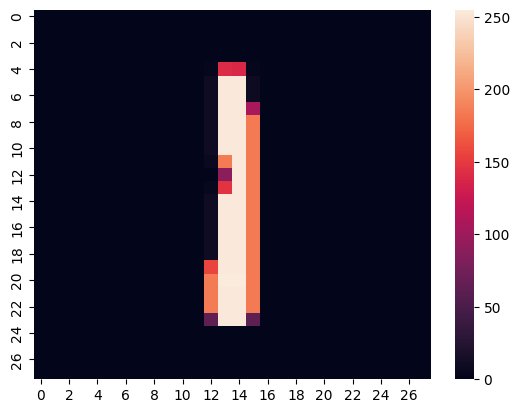

In [4]:
sns.heatmap(x.iloc[2].values.reshape(28,28))
plt.savefig('MNIST Dataset Row Implementation1.png')
plt.show()

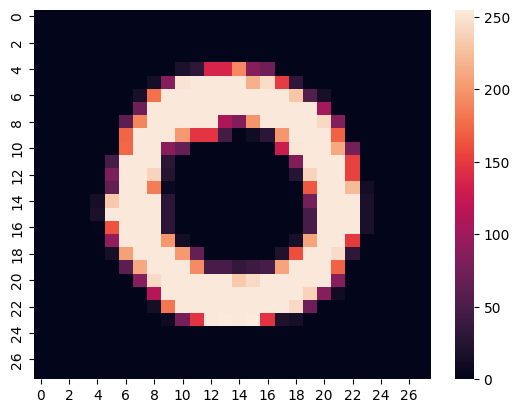

In [5]:
sns.heatmap(x.iloc[1].values.reshape(28,28))
plt.savefig('MNIST Dataset Row Implementation2.png')
plt.show()

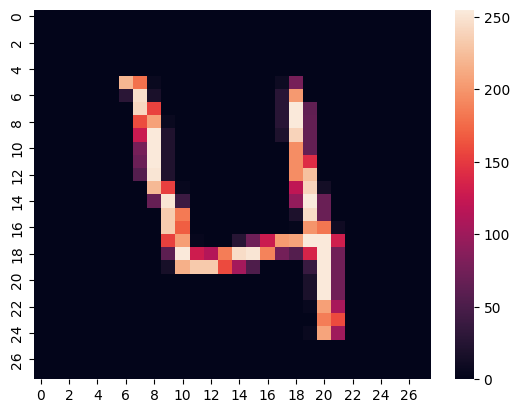

In [6]:
sns.heatmap(x.iloc[3].values.reshape(28,28))
plt.savefig('MNIST Dataset Row Implementation3.png')
plt.show()

<Axes: >

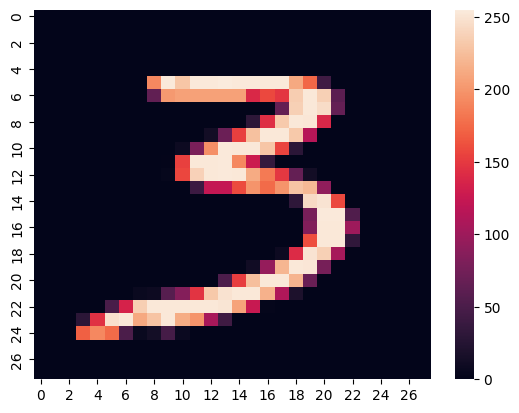

In [7]:
sns.heatmap(x.iloc[25].values.reshape(28,28)) 


In [8]:

rf=RandomForestClassifier(oob_score=True,n_estimators=500,verbose=True,n_jobs=-1,random_state=42)

rf.fit(x_train,y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.2min finished


RandomForestClassifier(n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=42, verbose=True)

In [9]:
rf.oob_score_

0.965

In [10]:
rf2=RandomForestClassifier(oob_score=True,n_estimators=500,verbose=True,n_jobs=-1,random_state=32,max_depth=7)
rf2.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   36.5s finished


RandomForestClassifier(max_depth=7, n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=32, verbose=True)

In [11]:
rf2.oob_score_
# OUtput 0.909345238095238

0.909345238095238

In [12]:
rf3=RandomForestClassifier(oob_score=True,n_estimators=500,verbose=True,n_jobs=-1,random_state=22,max_depth=6)
rf3.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.1min finished


RandomForestClassifier(max_depth=6, n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=22, verbose=True)

In [13]:
rf3.oob_score_

0.889077380952381

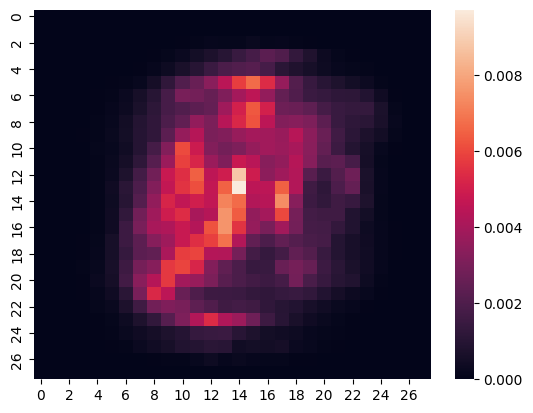

In [14]:
sns.heatmap(rf.feature_importances_.reshape(28,28))
plt.savefig('MNIST Dataset Feature Importance Implementation.png')
plt.show()

<Axes: >

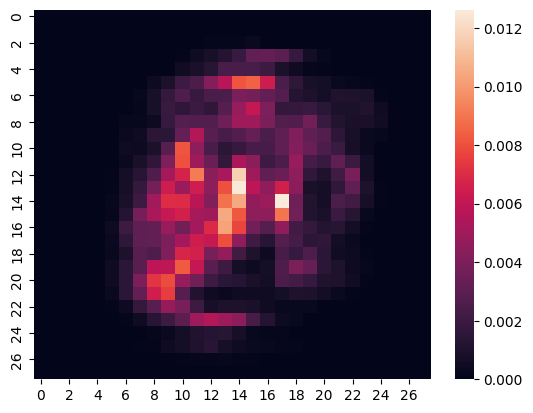

In [15]:
sns.heatmap(rf2.feature_importances_.reshape(28,28))

<Axes: >

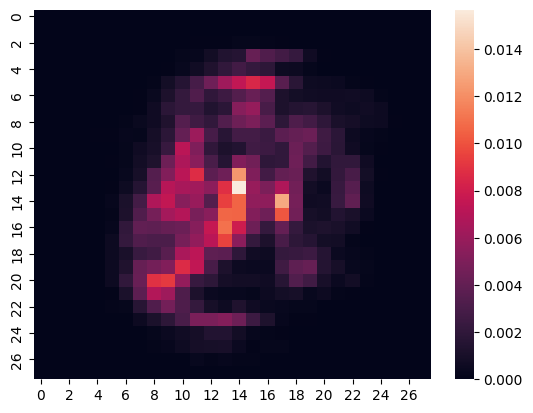

In [16]:
sns.heatmap(rf3.feature_importances_.reshape(28,28)) 

# Checking Accuracy 

In [17]:
y_pred=rf.predict(x_test)
y_pred2=rf2.predict(x_test)
y_pred3=rf3.predict(x_test)

print('Accuracy Scores are =\t',accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),sep='\t') 


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    5.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.5s finished


Accuracy Scores are =		0.9646428571428571	0.9122619047619047	0.8911904761904762


In [18]:
rf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.80224385e-07, 4.91066672e-07, 0.00000000e+00, 1.23825873e-07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.26806613e-07, 1.11268314e-06, 2.41158199e-06,
       3.67260384e-06, 3.11515318e-06, 2.95008964e-06, 2.64875621e-06,
       2.36542880e-06, 2.18284432e-06, 1.68432247e-06, 3.26942775e-06,
       2.59463104e-06, 1.12947484e-06, 1.32662017e-06, 1.53433842e-06,
       8.15277311e-07, 8.57454157e-07, 2.38034011e-07, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [19]:
rf2.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.30107379e-07, 7.26792487e-07, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [20]:
rf3.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      